<a href="https://colab.research.google.com/github/andresanchetta/Imersao_de_Dados_2021/blob/main/Aula4_Desafios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importando Dados

In [1]:
import pandas as pd

url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [2]:
dados.columns = dados.columns.str.replace('-','')
dados.head()

,id,tratamento,tempo,dose,droga,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c60,c61,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [3]:
mapa = {'droga': 'composto'}
dados.rename(columns=mapa, inplace=True)

In [4]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
contagem_moa = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

In [6]:
dados_resultados['n_moa'] = dados_resultados.drop('id', axis=1).sum(axis=1)

In [7]:
dados_resultados['ativo_moa'] = (dados_resultados['n_moa'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,adrenergic_receptor_antagonist,akt_inhibitor,aldehyde_dehydrogenase_inhibitor,alk_inhibitor,ampk_activator,analgesic,androgen_receptor_agonist,androgen_receptor_antagonist,anesthetic_-_local,angiogenesis_inhibitor,angiotensin_receptor_antagonist,anti-inflammatory,antiarrhythmic,antibiotic,anticonvulsant,antifungal,antihistamine,antimalarial,antioxidant,antiprotozoal,antiviral,apoptosis_stimulant,aromatase_inhibitor,atm_kinase_inhibitor,atp-sensitive_potassium_channel_antagonist,atp_synthase_inhibitor,atpase_inhibitor,atr_kinase_inhibitor,aurora_kinase_inhibitor,...,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,True


In [8]:
 dados_combinados = pd.merge(dados, dados_resultados[['id','n_moa', 'ativo_moa']], on='id')
 dados_combinados.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,c62,c63,c64,c65,c66,c67,c68,c69,c70,c71,c72,c73,c74,c75,c76,c77,c78,c79,c80,c81,c82,c83,c84,c85,c86,c87,c88,c89,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#Desafios

##Desafio 01: Encontrar o top 10, das ações do MOA (inibidor, agonista...)

In [12]:
#Primeiro criamos uma lista com todos os tipos de sufixos:
unique_moa_types = np.unique([col.split('_')[-1] for col in dados_resultados.drop('id',axis=1).columns])

#Então usamos o for para vasculhar o df e agrupar os tipos de sufixos
frequencias = dados_resultados.drop(['id','n_moa', 'ativo_moa'], axis=1).sum()
contadores = dict.fromkeys(unique_moa_types , [0])
for name in frequencias.index:
  contadores[name.split('_')[-1]] += frequencias[name]

#Por fim, verificamos as quantidades e imprimimos o top10:
contagem_final = pd.DataFrame.from_dict(contadores).T.rename({0:"count"},axis=1).sort_values(by='count', ascending=False)
contagem_final.head(10)

,count
inhibitor,9693
antagonist,3449
agonist,2330
blocker,323
agent,150
activator,115
local,80
antioxidant,73
anti-inflammatory,73
immunosuppressant,73


##Desafio 02: Criar a coluna eh_controle para quando na linha tratamento == com_controle

In [60]:
#Para incluir os dados através do loop for, é necessário usar esse formato:
dados_combinados.loc[0,'tratamento']
#Se usarmos dados_combinados['tratamento'][0] ocorre um Warning em relação a duplicidade
#https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

'com_droga'

In [61]:
#Para preencher os dados da coluna 'eh_controle' de forma numérica, onde True = 1 e False = 0, temos:
for i in range(0,len(dados_combinados)):
  if dados_combinados.loc[i,'tratamento']=='com_controle':
    dados_combinados.loc[i,'eh_controle'] = 1
  else:
    dados_combinados.loc[i,'eh_controle'] = 0

In [63]:
#Visualização da adição da coluna:
dados_combinados[['tratamento','eh_controle']]

,tratamento,eh_controle
0,com_droga,0
1,com_droga,0
2,com_droga,0
3,com_droga,0
4,com_droga,0
...,...,...
23809,com_droga,0
23810,com_droga,0
23811,com_controle,1
23812,com_droga,0


In [70]:
#Verificando se foi preenchida corretamente:
dados_combinados[['tratamento','eh_controle']].value_counts()

tratamento    eh_controle
com_droga     0              21948
com_controle  1               1866
dtype: int64

##Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72

In [68]:
#Para isso, utilizaremos novamente o preenchimento com o for, mas dessa vez com if, elif e else:
for i in range(0,len(dados_combinados)):
  if dados_combinados.loc[i,'tempo']==24:
    dados_combinados.loc[i,'24'] = 1
    dados_combinados.loc[i,'48'] = 0
    dados_combinados.loc[i,'72'] = 0
  elif dados_combinados.loc[i,'tempo']==48:
    dados_combinados.loc[i,'24'] = 0
    dados_combinados.loc[i,'48'] = 1
    dados_combinados.loc[i,'72'] = 0
  else:
    dados_combinados.loc[i,'24'] = 0
    dados_combinados.loc[i,'48'] = 0
    dados_combinados.loc[i,'72'] = 1

In [69]:
#Visualização da inclusao das colunas
dados_combinados[['tempo','24','48','72']]

,tempo,24,48,72
0,24,1.0,0.0,0.0
1,72,0.0,0.0,1.0
2,48,0.0,1.0,0.0
3,48,0.0,1.0,0.0
4,72,0.0,0.0,1.0
...,...,...,...,...
23809,24,1.0,0.0,0.0
23810,24,1.0,0.0,0.0
23811,48,0.0,1.0,0.0
23812,24,1.0,0.0,0.0


In [74]:
#Verificação do preenchimento
dados_combinados[['tempo','24','48','72']].value_counts()

tempo  24   48   72 
48     0.0  1.0  0.0    8250
72     0.0  0.0  1.0    7792
24     1.0  0.0  0.0    7772
dtype: int64

##Desafio 04: Estudar sobre combinações de DF https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

###**pd.concat():**
> concat(objs, axis=0, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=False, sort=False, copy=True)

* **Parâmetros:**
1. **objs:** uma sequência ou mapeamento de objetos Series ou DataFrame.   
Se um dicionário for passado, as chaves classificadas serão usadas como o argumento das chaves, a menos que seja passado, caso em que os valores serão selecionados. Quaisquer objetos None serão descartados silenciosamente a menos que sejam todos None, caso em que um ValueError será gerado.

1. **axis:** {0, 1, …}, default 0.  
O eixo ao longo do qual concatenar.

1. **join:** {‘inner’, ‘outer’}, default ‘outer’.  
Como lidar com índices em outro (s) eixo (s). Outer para união e inner para interseção.

1. **ignore_index:** boolean, default False.  
Se for True, não use os valores de índice no eixo de concatenação. O eixo resultante será rotulado 0, ..., n - 1. Isso é útil se você estiver concatenando objetos onde o eixo de concatenação não tem informações de indexação significativas. Observe que os valores de índice nos outros eixos ainda são respeitados na junção.

1. **keys:** sequence, default None.  
Construa um índice hierárquico usando as chaves passadas como o nível mais externo. Se vários níveis forem aprovados, deve conter tuplas.

1. **levels:** list of sequences, default None.  
Níveis específicos (valores únicos) a serem usados para construir um MultiIndex. Caso contrário, eles serão inferidos das chaves.

1. **names:** list, default None.  
Nomes para os níveis no índice hierárquico resultante.

1. **verify_integrity:** boolean, default False.  
Verifique se o novo eixo concatenado contém duplicatas. Isso pode ser muito caro em relação à concatenação de dados real.

1. **copy:** boolean, default True.  
Se for False, não copie os dados desnecessariamente.

>**Retorna:** Objeto ou tipos dos Objetos  
Ao concatenar todas as séries ao longo do índice (eixo = 0), uma série é retornada. Quando objs contém pelo menos um DataFrame, um DataFrame é retornado. Ao concatenar ao longo das colunas (eixo = 1), um DataFrame é retornado.

### **.join():**
> DataFrame.join(other, on=None, how='left', lsuffix='', rsuffix='', sort=False)[source]

* **Parâmetros:**
1. **other:** DataFrame, Series, ou lista de DataFrame  
O índice deve ser semelhante a uma das colunas desta. Se uma série for passada, seu atributo de nome deve ser definido, e isso será usado como o nome da coluna no DataFrame juntado resultante.

1. **on:** str, lista de str, ou array-like (Opcional)  
Nome (s) da coluna ou do nível de índice no chamador para ingressar no índice em outro, caso contrário, une-se ao índice no índice. Se vários valores forem fornecidos, o outro DataFrame deve ter um MultiIndex. Pode passar uma matriz como a chave de junção se ela ainda não estiver contida no DataFrame de chamada. Como uma operação VLOOKUP do Excel.

1. **how:**{‘left’, ‘right’, ‘outer’, ‘inner’}, default ‘left’  
How to handle the operation of the two objects.

* left: use o índice do frame de chamada (ou coluna, se on for especificado) 

* right: use o índice de **other**.

* outer: formar a união do índice do frame de chamada (ou coluna, se for especificado) com o índice de **other** e classificá-lo. lexicograficamente.

* inner: interseção da forma do índice do frame de chamada (ou coluna, se on for especificado) com o índice de **other**, preservando a ordem do índice da chamada.

4. **lsuffix: **str, default ‘’  
Sufixo a ser usado nas colunas sobrepostas do quadro esquerdo.

1. **rsuffix:** str, default ‘’  
Sufixo a ser usado nas colunas sobrepostas do quadro direito.

1. **sort:** bool, default False  
Ordene o DataFrame de resultado lexicograficamente pela chave de junção. Se for False, a ordem da chave de junção depende do tipo de junção (palavra-chave how).

>**Return:** Dataframe  
Um dataframe contendo colunas do chamador e de outro.

### **.merge():**

> DataFrame.merge(right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

* **Parâmetros:**

1. **right:** DataFrame ou named Series  
Objeto a ser mesclado.

1. **how:** {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’  
Tipo de merge a ser realizado:

* left: use apenas as chaves do quadro esquerdo, semelhante a uma junção externa esquerda em SQL; preservar a ordem das chaves.
* right: use apenas as chaves do quadro direito, semelhante a uma junção externa direita em SQL; preservar a ordem das chaves.
* outer: use a união de chaves de ambos os quadros, semelhante a uma junção externa completa em SQL; classificar as chaves lexicograficamente.
* inner: use a interseção de chaves de ambos os quadros, semelhante a uma junção interna em SQL; preservar a ordem das teclas esquerdas.
* cross: cria o produto cartesiano de ambos os quadros, preserva a ordem das teclas à esquerda.

3. **on:** label ou list  
Nomes de nível de coluna ou índice para unir. Eles devem ser encontrados em ambos os DataFrames. Se on for None e não estiver mesclando nos índices, o padrão é a interseção das colunas em ambos os DataFrames.

1. **left_on:** label ou list, ou array-like  
Nomes de nível de coluna ou índice para unir no DataFrame esquerdo. Também pode ser uma matriz ou lista de matrizes do comprimento do DataFrame esquerdo. Essas matrizes são tratadas como se fossem colunas.

1. **right_on:** label ou list, ou array-like  
Nomes de nível de coluna ou índice para unir no DataFrame correto. Também pode ser uma matriz ou lista de matrizes do comprimento do DataFrame correto. Essas matrizes são tratadas como se fossem colunas.

1. **left_index:** bool, default False  
Use o índice da esquerda DataFrame como a (s) chave (s) de junção. Se for um MultiIndex, o número de chaves no outro DataFrame (o índice ou um número de colunas) deve corresponder ao número de níveis.

1. **right_index:** bool, default False  
Use o índice do DataFrame correto como a chave de junção. Mesmas advertências de left_index.

1. **sort:** bool, default False
Classifique as chaves de junção lexicograficamente no DataFrame de resultado. Se for False, a ordem das chaves de junção depende do tipo de junção (palavra-chave how).

1. **suffixes:** list-like, default (“_x”, “_y”)  
Uma sequência de comprimento 2 em que cada elemento é opcionalmente uma string indicando o sufixo a ser adicionado aos nomes de colunas sobrepostas à esquerda e à direita, respectivamente. Passe um valor de Nenhum em vez de uma string para indicar que o nome da coluna da esquerda ou da direita deve ser deixado como está, sem sufixo. Pelo menos um dos valores não deve ser Nenhum.

1. **copy:** bool, default True  
Se for False, não copie os dados desnecessariamente.

1. **indicator: **bool ou str, default False  
Se True, adiciona uma coluna ao DataFrame de saída chamada “_merge” com informações sobre a origem de cada linha. A coluna pode receber um nome diferente, fornecendo um argumento de string. A coluna terá um tipo Categórico com o valor de "left_only" para observações cuja chave de mesclagem só aparece no DataFrame esquerdo, "right_only" para observações cuja chave de mesclagem só aparece no DataFrame direito e "ambos" se a chave de mesclagem da observação é encontrado em ambos os DataFrames.

1. **validate:** str (Opcional)
Se especificado, verifica se a mesclagem é do tipo especificado:
* “One_to_one” ou “1: 1”: verifique se as chaves de mesclagem são exclusivas nos conjuntos de dados esquerdo e direito.
* “One_to_many” ou “1: m”: verifique se as chaves de mesclagem são exclusivas no conjunto de dados esquerdo.
* “Many_to_one” ou “m: 1”: verifique se as chaves de mesclagem são exclusivas no conjunto de dados correto.
* “Many_to_many” ou “m: m”: permitido, mas não resulta em verificações.
  
> **Retorna:** DataFrame
Um DataFrame dos dois objetos mesclados.

### **.compare():**

> DataFrame.compare(other, align_axis=1, keep_shape=False, keep_equal=False)

* **Parâmetros:**

1. **other:** DataFrame
Objeto de comparação.

1. **align_axis:** {0 ou ‘index’, 1 ou ‘columns’}, default 1
Determine em qual eixo alinhar a comparação:
* 0, ou 'index' As diferenças resultantes são empilhadas verticalmente
com linhas desenhadas alternadamente entre si e outro.
* 1, ou 'columns' As diferenças resultantes são alinhadas horizontalmente
com colunas tiradas alternadamente de si mesmo e de outro.

3. **keep_shape:** bool, default False  
Se verdadeiro, todas as linhas e colunas são mantidas. Caso contrário, apenas aqueles com valores diferentes são mantidos.

1. **keep_equal:** bool, default False  
Se verdadeiro, o resultado mantém os valores iguais. Caso contrário, valores iguais são mostrados como NaNs.

> **Retorna:** DataFrame  
DataFrame que mostra as diferenças empilhadas lado a lado.
O índice resultante será um MultiIndex com 'self' e 'other' empilhados alternadamente no nível interno.

##Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)

In [76]:
#Para essa análise, foi escolhido as 2 drogas mais utilizada, além da de controle, uma vez que estas teram mais dados para comparação:
dados_combinados[['tratamento','composto']].value_counts()

tratamento    composto 
com_controle  cacb2b860    1866
com_droga     87d714366     718
              9f80f3f77     246
              8b87a7a83     203
              5628cb3ee     202
                           ... 
              b3f24a171       1
              1502f8cbb       1
              36dc71f82       1
              b472193a9       1
              547f80a41       1
Length: 3289, dtype: int64

Como visto no código acima, a droga de controle é o composto **cacb2b860** e os compostos mais utlizados for **87d714366** e **9f80f3f77**, respectivamente.

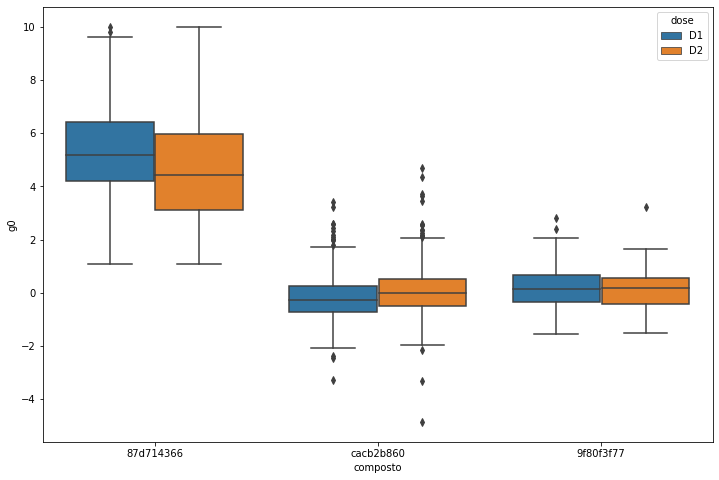

In [94]:
#Portanto armazenamos esses compostas em uma lista para facilitar as análises
lista_analise = ['cacb2b860','87d714366', '9f80f3f77']

#Então podemos analisar em relação as variações de dose
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados.query('composto in @lista_analise'), y= 'g0', x='composto', hue='dose')

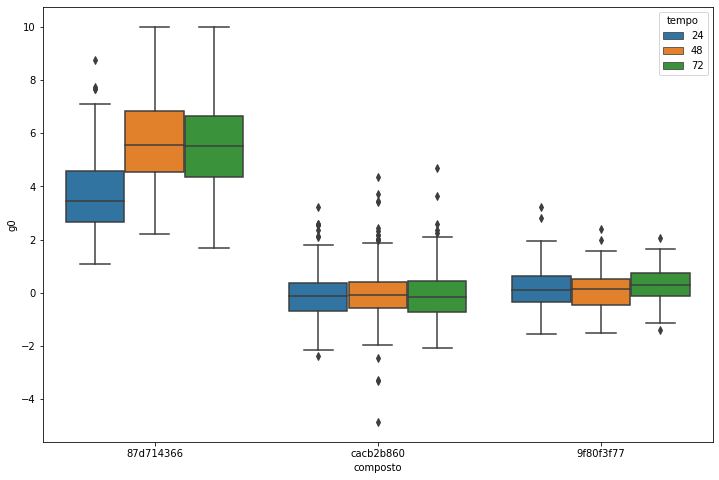

In [95]:
#Análise em relação ao tempo
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados.query('composto in @lista_analise'), y= 'g0', x='composto', hue='tempo')

##Desafio 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA 

In [132]:
#Criando duas tabelas, uma com os MoA's ativos e uma apenas com os inativos:
composto_ativa_moa = dados_combinados.query('ativo_moa == True')
composto_nao_ativa_moa = dados_combinados.query('ativo_moa == False')

#Então utilizamos um merge com o composto como primary key, de forma a indicar se o mesmo valor é encontrado nas duas tabelas:
composto_ativa_nao_ativa = pd.merge(composto_ativa_moa, composto_nao_ativa_moa, on=['composto'], how='outer', indicator=True)      

In [133]:
composto_ativa_nao_ativa['_merge'].value_counts()

left_only     14447
right_only     9367
both              0
Name: _merge, dtype: int64

A analise acima nos retornou que não há elementos nas duas tabelas.
Portanto, podemos concluir que não há compostos os quais ativam ou não ativam MoA's dependendo da configuração do experimento.

##Desafio 07: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes

Para esse desafio, teremos que verificar os valores para os diferentes tipos de MoA's, portanto iremos criar uma tabela que una tudo.

In [134]:
dados_tudo = pd.merge(dados, dados_resultados.loc[:,:'wnt_inhibitor'], on='id')
dados_tudo.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18,g19,g20,g21,g22,g23,g24,g25,g26,g27,g28,g29,g30,g31,g32,g33,g34,...,protein_synthesis_inhibitor,protein_tyrosine_kinase_inhibitor,radiopaque_medium,raf_inhibitor,ras_gtpase_inhibitor,retinoid_receptor_agonist,retinoid_receptor_antagonist,rho_associated_kinase_inhibitor,ribonucleoside_reductase_inhibitor,rna_polymerase_inhibitor,serotonin_receptor_agonist,serotonin_receptor_antagonist,serotonin_reuptake_inhibitor,sigma_receptor_agonist,sigma_receptor_antagonist,smoothened_receptor_antagonist,sodium_channel_inhibitor,sphingosine_receptor_agonist,src_inhibitor,steroid,syk_inhibitor,tachykinin_antagonist,tgf-beta_receptor_inhibitor,thrombin_inhibitor,thymidylate_synthase_inhibitor,tlr_agonist,tlr_antagonist,tnf_inhibitor,topoisomerase_inhibitor,transient_receptor_potential_channel_antagonist,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [135]:
#Criando a lista dos MoA's para ser usada no loop:
moas_loop = dados_resultados.drop('id',axis=1).columns[:-2]
moas_loop

Index(['5-alpha_reductase_inhibitor', '11-beta-hsd1_inhibitor',
       'acat_inhibitor', 'acetylcholine_receptor_agonist',
       'acetylcholine_receptor_antagonist', 'acetylcholinesterase_inhibitor',
       'adenosine_receptor_agonist', 'adenosine_receptor_antagonist',
       'adenylyl_cyclase_activator', 'adrenergic_receptor_agonist',
       ...
       'tropomyosin_receptor_kinase_inhibitor', 'trpv_agonist',
       'trpv_antagonist', 'tubulin_inhibitor', 'tyrosine_kinase_inhibitor',
       'ubiquitin_specific_protease_inhibitor', 'vegfr_inhibitor', 'vitamin_b',
       'vitamin_d_receptor_agonist', 'wnt_inhibitor'],
      dtype='object', length=206)

In [136]:
#Criando DF agrupado por composto:
dados_agrupados = dados_tudo.groupby(by='composto')

In [140]:
#Utilizar o loop para verificar:
for moa in moas_loop: 
  count = 0
  grupo = dados_agrupados[moa].nunique() #Calcula os valores unicos dos MoA's em questão para cada composto analisado
  for i in range(len(grupo)):
    if grupo[i] == 1:
      pass
    else:
      count += 1
      print(grupo[i].index)

  if count == 1:
    print(f'MoA {moa} é ativado ou não dependendo das condições')
print('Fim')

Fim


Após rodar o código acima, podemos concluir que nenhum MoA diferente foi ativado dependendo das condições.


##Desafio 08: Resumo do que você aprendeu com os dados

Nesta aula descobrimos sobre os MoA's, pudemos utilizar tecnicas de junção de tabelas, e analisar as relações entre os compostos e os MoA's.